In [1]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


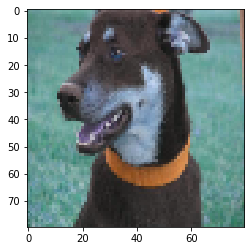

In [3]:
infile = open('/content/drive/MyDrive/y.pkl','rb')
y_train = pickle.load(infile)

infile = open('/content/drive/MyDrive/X.pkl','rb')
X_train = pickle.load(infile)

infile = open('/content/drive/MyDrive/X_test.pkl','rb')
X_test = pickle.load(infile)

from matplotlib import pyplot as plt
plt.imshow(X_train[4], interpolation='nearest')
plt.show()

x_train shape:  (648, 80, 80, 3)
y_train shape (648,)
test shape:  (288, 80, 80, 3)


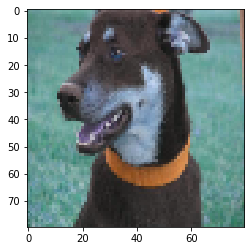

In [4]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test/255.0
#y_train = y_train / 255.0
print("x_train shape: ",np.shape(X_train))
print("y_train shape", np.shape(y_train))
print("test shape: ",np.shape(X_test))

from matplotlib import pyplot as plt
plt.imshow(X_train[4], interpolation='nearest')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Conv2D
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import MaxPool2D
from keras.preprocessing.image import ImageDataGenerator

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state=42)
print("x_train shape",np.shape(X_train))
print("x_test shape",np.shape(X_val))
print("y_train shape",np.shape(y_train))
print("y_test shape",np.shape(y_val))

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3,3), activation = "relu", input_shape = (80,80,3)))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units = 256, activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(units = 1, activation = "sigmoid"))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
# adam optimizer ile dene
datagen = ImageDataGenerator(
         featurewise_center=False,  # set input mean to 0 over the dataset
         samplewise_center=False,  # set each sample mean to 0
         featurewise_std_normalization=False,  # divide inputs by std of the dataset
         samplewise_std_normalization=False,  # divide each input by its std
         zca_whitening=False,  # dimesion reduction
         rotation_range=5,  # randomly rotate images in the range 5 degrees
         zoom_range = 0.1, # Randomly zoom image 10%
         width_shift_range=0.1,  # randomly shift images horizontally 10%
         height_shift_range=0.1,  # randomly shift images vertically 10%
         horizontal_flip=False,  # randomly flip images
         vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

batch_size= 128

model.summary()

hist = model.fit(datagen.flow(X_train,y_train,
                              batch_size=batch_size),
                              validation_data = (X_val,y_val), 
                              epochs = 128, batch_size=64)


x_train shape (453, 80, 80, 3)
x_test shape (195, 80, 80, 3)
y_train shape (453,)
y_test shape (195,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 39, 39, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                    

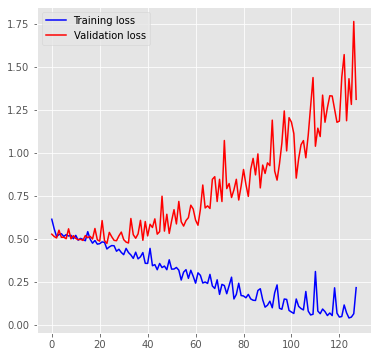

<Figure size 432x288 with 0 Axes>

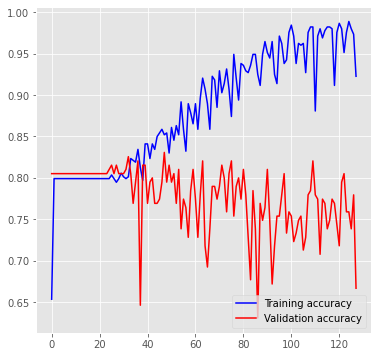

In [6]:
plt.figure(figsize=(6,6))
plt.style.use("ggplot")
plt.plot(hist.history['loss'], color='b', label="Training loss")
plt.plot(hist.history['val_loss'], color='r', label="Validation loss")
plt.legend()
plt.show()

plt.figure()

plt.figure(figsize=(6,6))
plt.style.use("ggplot")
plt.plot(hist.history['accuracy'], color='b', label="Training accuracy")
plt.plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend(loc = "lower right")
plt.show()

In [7]:
model.save("bestmodel.h5")

In [8]:
model.predict(X_val).ravel()

array([5.96711040e-01, 5.70626020e-01, 1.91973768e-07, 2.74734378e-01,
       3.12298715e-01, 5.87503016e-02, 4.79952246e-01, 9.96618748e-01,
       7.13924766e-01, 8.43902349e-01, 1.23500824e-02, 9.79527771e-01,
       3.02788128e-10, 6.92267418e-02, 9.85165358e-01, 9.98706818e-01,
       9.82781112e-01, 9.65176463e-01, 9.43114519e-01, 2.71663964e-02,
       1.38675387e-05, 7.20091164e-02, 7.29128718e-03, 3.34829092e-04,
       1.19858905e-05, 1.40375108e-01, 5.14218527e-07, 2.97491819e-01,
       4.81848657e-01, 2.66628593e-01, 5.95115423e-02, 6.07838929e-02,
       3.25191228e-11, 9.99955297e-01, 9.58932459e-01, 4.42551762e-01,
       7.40841389e-01, 6.90912485e-01, 3.89583409e-01, 1.16146773e-01,
       9.91802692e-01, 1.54392689e-01, 7.94740200e-01, 4.07311708e-01,
       3.81521386e-06, 9.83444095e-01, 1.98162131e-09, 1.72747254e-01,
       6.38377368e-02, 6.60372138e-01, 9.72628593e-04, 8.10910761e-02,
       6.85523748e-01, 2.31789052e-02, 3.72853875e-03, 6.97404146e-04,
      

In [9]:
model.predict(X_test).ravel()

array([3.64237010e-01, 9.99964595e-01, 8.21738541e-01, 6.32825494e-03,
       4.91619758e-05, 1.76459551e-04, 9.99264717e-01, 9.20592070e-01,
       8.56906176e-04, 9.98765051e-01, 1.95762761e-16, 9.99674439e-01,
       4.55371236e-07, 8.50963843e-05, 9.98551011e-01, 9.99264717e-01,
       8.72325131e-07, 9.90393817e-01, 1.09718894e-04, 3.17907211e-06,
       2.89160013e-03, 9.79527771e-01, 9.31020975e-02, 9.98699903e-01,
       1.65330172e-02, 9.98486876e-01, 1.34002154e-09, 9.99444723e-01,
       8.95795226e-01, 9.99999583e-01, 9.92975712e-01, 9.99650359e-01,
       2.27066875e-02, 9.93810773e-01, 3.63292992e-02, 8.74942780e-01,
       9.99693274e-01, 8.72942507e-01, 9.99998093e-01, 9.06148374e-01,
       4.12595272e-03, 9.87681508e-01, 2.63229311e-02, 1.46126126e-06,
       9.23925638e-03, 9.00667310e-02, 9.87681508e-01, 9.97168779e-01,
       3.27640772e-03, 9.96355355e-01, 3.96194519e-05, 7.49842584e-01,
       9.66221094e-04, 9.97855186e-01, 6.38377368e-02, 5.14218527e-07,
      